In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import collections 
import numpy as np
import seaborn as sns
from math import isnan
%matplotlib inline

# Read dateset

In [2]:
#reading Vehicle_Information dataframe
vi=pd.read_csv('Vehicle_Information.csv',sep=',',encoding ='latin1',low_memory=False)

#read Accident_Information dataframe
ai=pd.read_csv('Accident_Information.csv',sep=',',encoding ='latin1',low_memory=False)

# Preprocessing 

#### transforme string datatype into categorical where it make sense (<600 unique values)

In [3]:
df=vi
for col in df:
    if (df[col].dtype!='object'): continue
    if (df[col].nunique()>600): continue
    df[col]=df[col].astype('category')    

#### for  accident Information dataframe I also change date column to standart date type

In [4]:
#transforming string datatypes
df=ai
ai['Date']= pd.to_datetime(ai['Date'], format="%Y-%m-%d")

#fix null values
ai['2nd_Road_Number']=ai['2nd_Road_Number'].replace(0.0, np.nan)

#change number code to real meaning
col='Did_Police_Officer_Attend_Scene_of_Accident'
ai[col]=ai[col].replace(1, 'Yes').replace(2,'No').replace(3,' No - accident was reported using a self completion form (self rep only)')

for col in df:
    if (df[col].dtype!='object'): continue
    if (df[col].nunique()>600): continue
    df[col]=df[col].astype('category')    

##### introduce new column "Hour" (Hour of accident)

In [5]:
#This cell is copypaste from another kernal
#make a 'hour' column in Ac. Info. dataframe

# slice first and second string from time column
ai['Hour'] = ai['Time'].str[0:2]

# convert new column to numeric datetype
ai['Hour'] = pd.to_numeric(ai['Hour'])

ai = ai.dropna(subset=['Hour'])

# cast to integer values
ai['Hour'] = ai['Hour'].astype('int')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [6]:
vi.head()

Accident_Index Age_Band_of_Driver  Age_of_Vehicle  \
0  200401BS00001            26 - 35             3.0   
1  200401BS00002            26 - 35             NaN   
2  200401BS00003            26 - 35             4.0   
3  200401BS00003            66 - 75             NaN   
4  200401BS00004            26 - 35             1.0   

          Driver_Home_Area_Type  Driver_IMD_Decile  Engine_Capacity_.CC.  \
0                    Urban area                4.0                1588.0   
1                    Urban area                3.0                   NaN   
2  Data missing or out of range                NaN                 998.0   
3  Data missing or out of range                NaN                   NaN   
4                    Urban area                4.0                 124.0   

  Hit_Object_in_Carriageway Hit_Object_off_Carriageway  \
0                      None                       None   
1                      None                       None   
2                      None                       None   
3                      None                       None   
4                      None                       None   

      Journey_Purpose_of_Driver             Junction_Location  ...   \
0  Data missing or out of range  Data missing or out of range  ...    
1  Data missing or out of range  Data missing or out of range  ...    
2  Data missing or out of range  Data missing or out of range  ...    
3  Data missing or out of range  Data missing or out of range  ...    
4  Data missing or out of range  Data missing or out of range  ...    

  Skidding_and_Overturning Towing_and_Articulation  \
0                     None     No tow/articulation   
1                     None     No tow/articulation   
2                     None     No tow/articulation   
3                     None     No tow/articulation   
4                     None     No tow/articulation   

  Vehicle_Leaving_Carriageway Vehicle_Location.Restricted_Lane  \
0   Did not leave carriageway                              0.0   
1   Did not leave carriageway                              0.0   
2   Did not leave carriageway                              0.0   
3   Did not leave carriageway                              0.0   
4   Did not leave carriageway                              0.0   

   Vehicle_Manoeuvre Vehicle_Reference                Vehicle_Type  \
0  Going ahead other                 2                         109   
1  Going ahead other                 1                         109   
2      Turning right                 1                         109   
3  Going ahead other                 2                         109   
4  Going ahead other                 1  Motorcycle 125cc and under   

    Was_Vehicle_Left_Hand_Drive X1st_Point_of_Impact  Year  
0  Data missing or out of range                Front  2004  
1  Data missing or out of range                Front  2004  
2  Data missing or out of range                Front  2004  
3  Data missing or out of range                Front  2004  
4  Data missing or out of range                Front  2004  

[5 rows x 24 columns]

In [7]:
ai.head()

Accident_Index 1st_Road_Class  1st_Road_Number 2nd_Road_Class  \
0  200501BS00001              A           3218.0            NaN   
1  200501BS00002              B            450.0              C   
2  200501BS00003              C              0.0            NaN   
3  200501BS00004              A           3220.0            NaN   
4  200501BS00005   Unclassified              0.0            NaN   

   2nd_Road_Number Accident_Severity Carriageway_Hazards       Date  \
0              NaN           Serious                None 2005-01-04   
1              NaN            Slight                None 2005-01-05   
2              NaN            Slight                None 2005-01-06   
3              NaN            Slight                None 2005-01-07   
4              NaN            Slight                None 2005-01-10   

  Day_of_Week Did_Police_Officer_Attend_Scene_of_Accident ...   \
0     Tuesday                                         Yes ...    
1   Wednesday                                         Yes ...    
2    Thursday                                         Yes ...    
3      Friday                                         Yes ...    
4      Monday                                         Yes ...    

  Road_Surface_Conditions           Road_Type  Special_Conditions_at_Site  \
0             Wet or damp  Single carriageway                        None   
1                     Dry    Dual carriageway                        None   
2                     Dry  Single carriageway                        None   
3                     Dry  Single carriageway                        None   
4             Wet or damp  Single carriageway                        None   

  Speed_limit   Time Urban_or_Rural_Area     Weather_Conditions  Year  \
0        30.0  17:42               Urban  Raining no high winds  2005   
1        30.0  17:36               Urban     Fine no high winds  2005   
2        30.0  00:15               Urban     Fine no high winds  2005   
3        30.0  10:35               Urban     Fine no high winds  2005   
4        30.0  21:13               Urban     Fine no high winds  2005   

   InScotland Hour  
0          No   17  
1          No   17  
2          No    0  
3          No   10  
4          No   21  

[5 rows x 35 columns]

# Make simple analysis 

## Data distribution for most interesting columns
#### I made "all_plot function" to do not repeat same code for both dataframes

In [11]:
#plot barchart or histogramm where it make some sense
def all_plot(df,interesting=None):
    for col in df:
        if (interesting!=None and not col in interesting): continue
        print(col)
        #print(df[col].dtype)
        cat=df[col].astype('category')
        #print(len(cat.cat.categories))
        mask=df[col].notnull()
        number_of_nulls=collections.Counter(mask)[True]
        print('number of nulls is '+str(int(10000*(len(mask)-number_of_nulls)/len(mask))/100)+'%')
        if (df[col].dtype in ('int64','int32','float64')):
            sns.distplot(df[mask][col], kde=False)
            plt.show()
        elif (len(cat.cat.categories)<30):
            sns.countplot(y=cat)
            plt.show()

Accident Information dataframe:

Accident_Severity
number of nulls is 0.0%


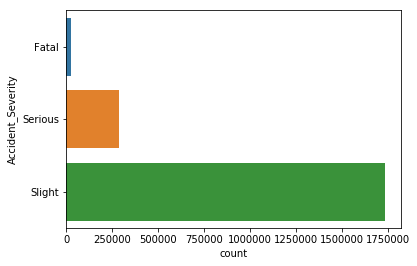

Day_of_Week
number of nulls is 0.0%


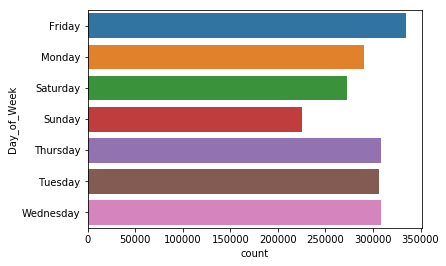

Junction_Control
number of nulls is 0.0%


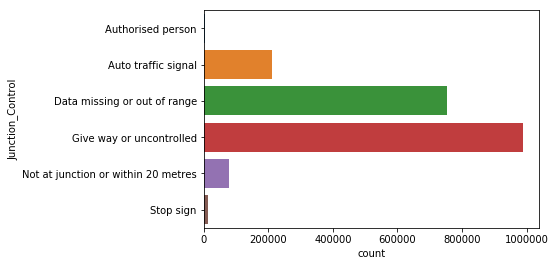

Junction_Detail
number of nulls is 0.0%


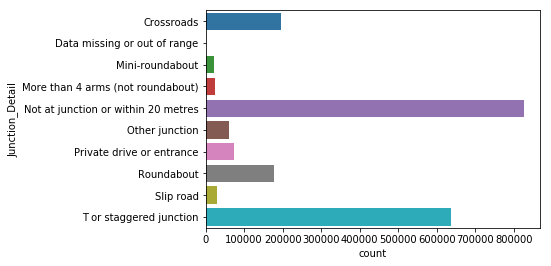

Light_Conditions
number of nulls is 0.0%


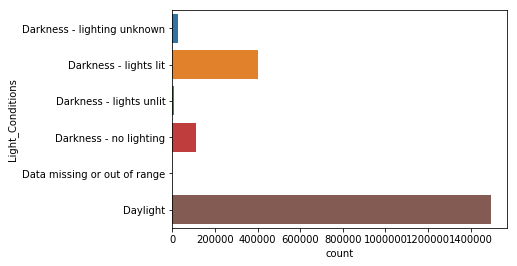

Weather_Conditions
number of nulls is 0.0%


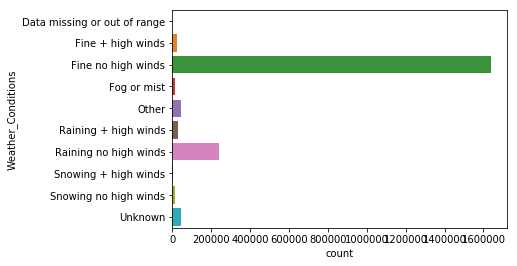

Vehicle Information dataframe:

Junction_Location
number of nulls is 0.0%


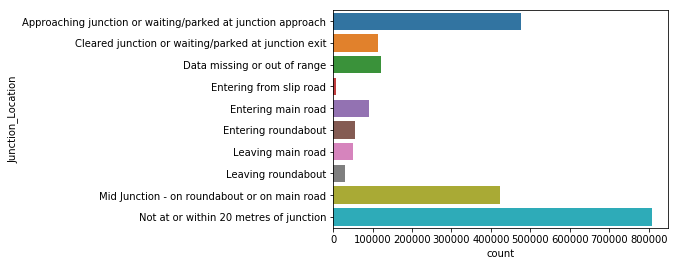

Vehicle_Manoeuvre
number of nulls is 0.0%


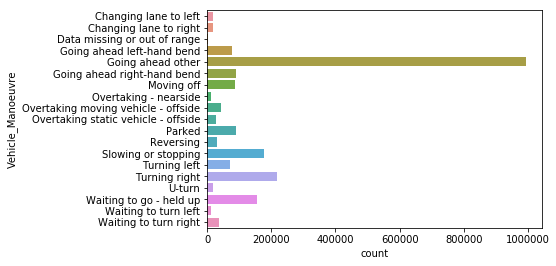

X1st_Point_of_Impact
number of nulls is 0.0%


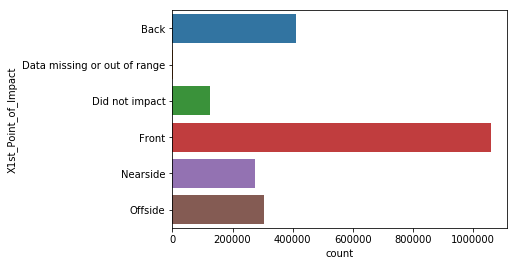

In [14]:
interesting=['Accident_Severity','Day_of_Week','Junction_Control','Junction_Detail','Light_Conditions','Weather_Conditions','Vehicle_Manoeuvre','X1st_Point_of_Impact','Junction_Location','Vehicle_Manoeuvre']
print ('Accident Information dataframe:\n')
all_plot(ai,interesting)
print ('Vehicle Information dataframe:\n')
all_plot(vi,interesting)

# Merge dataframes into one via 'Accident_Index'
### Take 2016 year from merged dataframe

In [8]:
new_df=pd.merge(ai,vi.drop('Year',axis=1),on='Accident_Index')

df2016=new_df[new_df['Year']==2016]

In [10]:
len(df2016)

252496

In [11]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058262 entries, 0 to 2058261
Data columns (total 57 columns):
Accident_Index                                 object
1st_Road_Class                                 category
1st_Road_Number                                float64
2nd_Road_Class                                 category
2nd_Road_Number                                float64
Accident_Severity                              category
Carriageway_Hazards                            category
Date                                           datetime64[ns]
Day_of_Week                                    category
Did_Police_Officer_Attend_Scene_of_Accident    category
Junction_Control                               category
Junction_Detail                                category
Latitude                                       float64
Light_Conditions                               category
Local_Authority_(District)                     category
Local_Authority_(Highway)                     

# I made 2 association matrices of accident Information dataframe
#### next two function measure association between two categorical columns
#### code taken from [here](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)

In [23]:
#algoritms to measure association 
from collections import Counter
import scipy.stats as ss
import math

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
def conditional_entropy(x, y):
    #used in theils_u
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy
def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

### The idea is that
### 1) transform every column to type categorica that possiblel and drop the others
### 2) make matrix and draw heatmap of it
## The next cell uses symmetrical algoritm "cramers_v" 

Wall time: 40.4 s


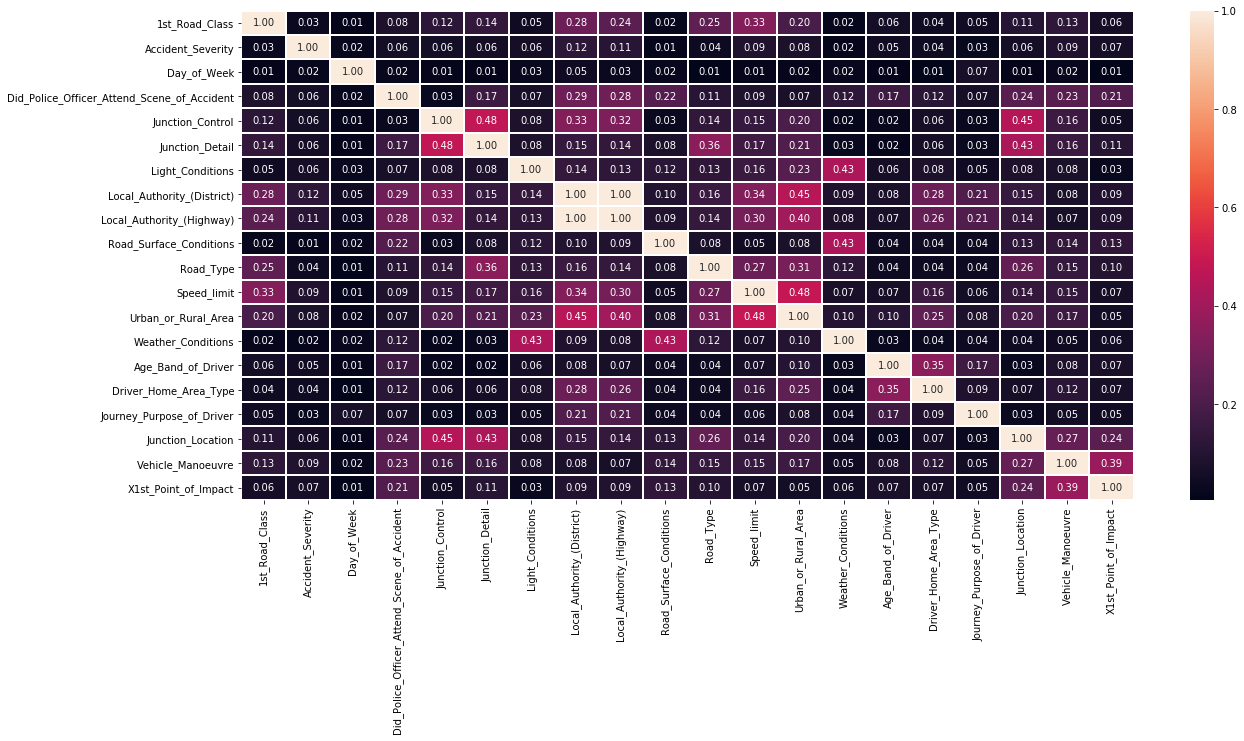

In [34]:
%%time
#cramers_v algoritm
interesting=['1st_Road_Class','Accident_Severity','Day_of_Week','Did_Police_Officer_Attend_Scene_of_Accident','Junction_Control','Junction_Detail','Light_Conditions','Road_Surface_Conditions','Road_Type','Speed_limit','Urban_or_Rural_Area','Weather_Conditions','Driver_Home_Area_Type','Age_Band_of_Driver','Journey_Purpose_of_Driver','Junction_Location','Vehicle_Manoeuvre','X1st_Point_of_Impact','Local_Authority_(District)','Local_Authority_(Highway)']

df=df2016.copy(deep=True)
for col in df:
    if (not col in interesting):
        df=df.drop(col, axis=1)
        continue
    d=df[col].dtype
    if (str(d)=='category'):
        df[col]=df[col].astype('str').astype('category')
        continue
    if (df[col].nunique()<600):
        df[col]=df[col].astype('str').astype('category')
    else:
        df=df.drop(col, axis=1)

l=len(df.columns)
matrix=np.zeros((l,l))

for i,e1 in enumerate(df):
    for j,e2 in enumerate(df):
        if (j>i): continue
        #print(i,j)
        val=cramers_v(df[e1],df[e2])
        matrix[i][j]=val
        matrix[j][i]=val
plt.figure(figsize = (20,9))

plot=sns.heatmap(matrix, 
        xticklabels=df.columns,
        yticklabels=df.columns,
        #center=0.5,
        linewidths=1,
        annot=True, fmt=".2f"
        )

## The next cell uses asymmetrical algoritm "theils_u" 

Wall time: 2min 13s


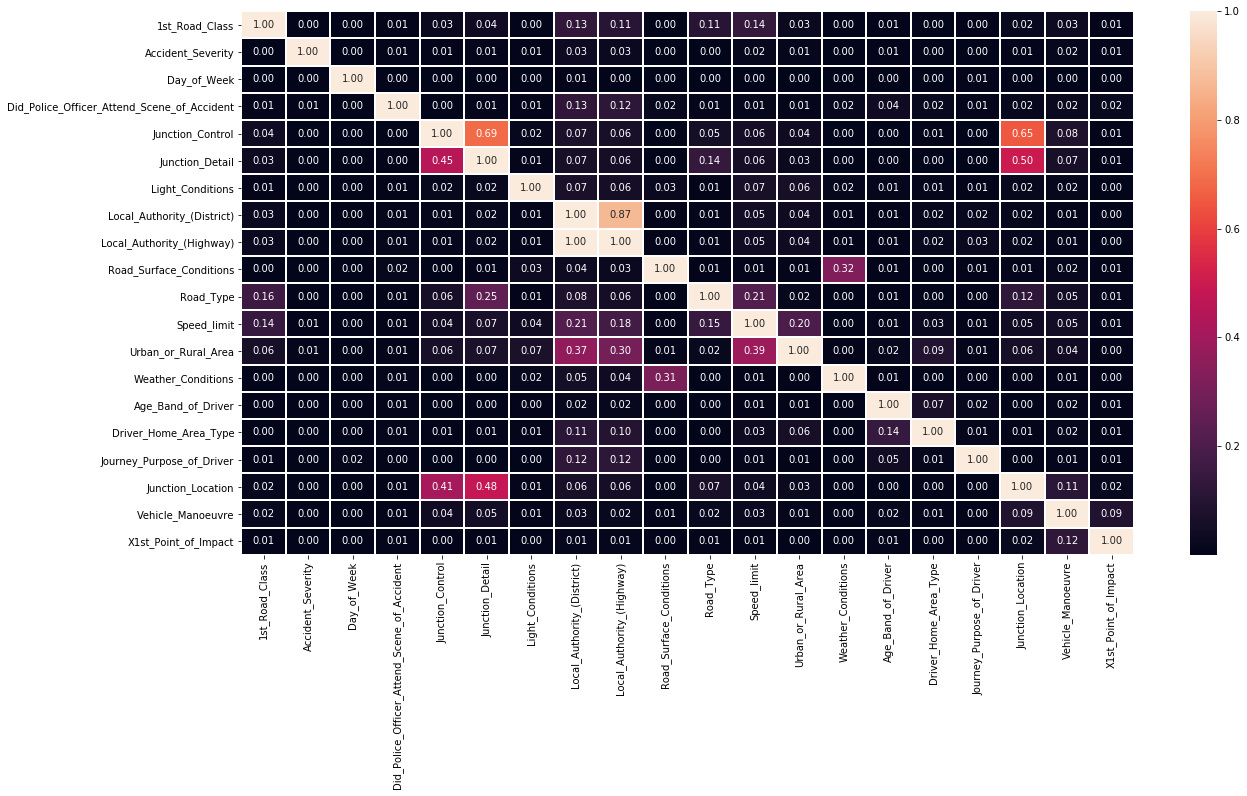

In [35]:
%%time
#theils_u algoritm
interesting=['1st_Road_Class','Accident_Severity','Day_of_Week','Did_Police_Officer_Attend_Scene_of_Accident','Junction_Control','Junction_Detail','Light_Conditions','Road_Surface_Conditions','Road_Type','Speed_limit','Urban_or_Rural_Area','Weather_Conditions','Driver_Home_Area_Type','Age_Band_of_Driver','Journey_Purpose_of_Driver','Junction_Location','Vehicle_Manoeuvre','X1st_Point_of_Impact','Local_Authority_(District)','Local_Authority_(Highway)']

df=df2016.copy(deep=True)
for col in df:
    if (not col in interesting):
        df=df.drop(col, axis=1)
        continue
    d=df[col].dtype
    if (str(d)=='category'):
        df[col]=df[col].astype('str').astype('category').replace('nan', np.NaN)
        continue
    if (df[col].nunique()<600):
        df[col]=df[col].astype('str').astype('category').replace('nan', np.NaN)
    else:
        df=df.drop(col, axis=1)

l=len(df.columns)
matrix=np.zeros((l,l))

for i,e1 in enumerate(df):
    for j,e2 in enumerate(df):
        val=theils_u(df[e1],df[e2])
        matrix[i][j]=val

plt.figure(figsize = (20,10))
plot=sns.heatmap(matrix, 
        xticklabels=df.columns,
        yticklabels=df.columns,
        #center=0.5,
        linewidths=1,
        annot=True, fmt=".2f"
        )

***
***
# cluster data

In [30]:
from kmodes.kmodes import KModes

df=df2016.copy(deep=True)

### I use kModes alorithm
### for it to run I need to transform every column to type categorica that possiblel and drop the others

### drop '2nd_Road_Class' because it contains 41.23% of null data

In [36]:
df=df.drop('2nd_Road_Class',axis=1)
for col in df:
    d=df[col].dtype
    if (str(d)=='category'):
        df[col]=df[col].astype('str').astype('category') #.replace('nan',np.NaN)
        continue
    if (df[col].nunique()<600):
        df[col]=df[col].astype('str').astype('category') #.replace('nan',np.NaN)
    else:
        df=df.drop(col, axis=1)

In [37]:
df.dtypes

1st_Road_Class                                 category
Accident_Severity                              category
Carriageway_Hazards                            category
Date                                           category
Day_of_Week                                    category
Did_Police_Officer_Attend_Scene_of_Accident    category
Junction_Control                               category
Junction_Detail                                category
Light_Conditions                               category
Local_Authority_(District)                     category
Local_Authority_(Highway)                      category
Number_of_Casualties                           category
Number_of_Vehicles                             category
Pedestrian_Crossing-Human_Control              category
Pedestrian_Crossing-Physical_Facilities        category
Police_Force                                   category
Road_Surface_Conditions                        category
Road_Type                                      c

In [39]:
%%time
n_clusters=4
km=KModes(n_clusters=n_clusters,n_jobs=-1,random_state=42,init='Huang')
clusters = km.fit_predict(df)


Wall time: 13min 53s


## Try to understand what each cluster mean
### draw association between each column and clusters using cramer's V

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


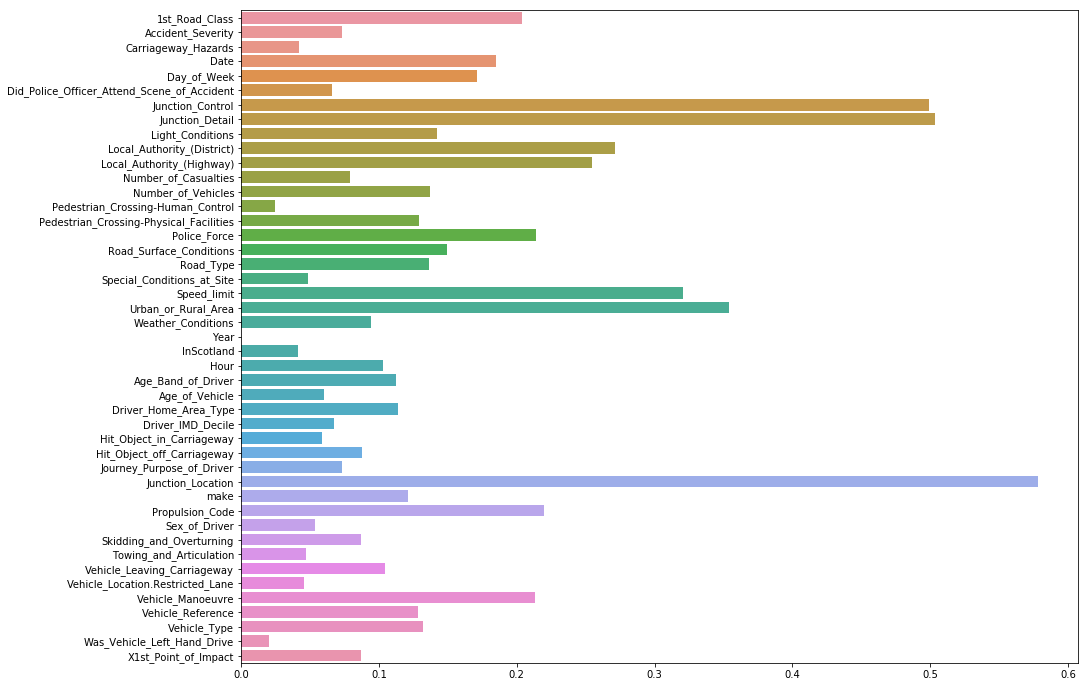

In [40]:
#lets see how each column correlate with clusters
barlist=[]
for e in df:
    v=cramers_v(df[e],clusters)
    barlist.append([v])
plt.figure(figsize = (15,12))
sns.barplot(data=barlist,orient='h')
plt.yticks(np.arange(len(df.columns)),df.columns)
plt.show()

### Print centroids

In [41]:
pd.DataFrame(km.cluster_centroids_,columns=df.columns).T

0  \
1st_Road_Class                                                         Unclassified   
Accident_Severity                                                            Slight   
Carriageway_Hazards                                                            None   
Date                                                                     2016-11-25   
Day_of_Week                                                                  Friday   
Did_Police_Officer_Attend_Scene_of_Accident                                     Yes   
Junction_Control                                       Data missing or out of range   
Junction_Detail                                 Not at junction or within 20 metres   
Light_Conditions                                                           Daylight   
Local_Authority_(District)                                                    Leeds   
Local_Authority_(Highway)                                                    Surrey   
Number_of_Casualties                                                              1   
Number_of_Vehicles                                                                2   
Pedestrian_Crossing-Human_Control                                               0.0   
Pedestrian_Crossing-Physical_Facilities                                         0.0   
Police_Force                                                    Metropolitan Police   
Road_Surface_Conditions                                                         Dry   
Road_Type                                                        Single carriageway   
Special_Conditions_at_Site                                                     None   
Speed_limit                                                                    30.0   
Urban_or_Rural_Area                                                           Urban   
Weather_Conditions                                               Fine no high winds   
Year                                                                           2016   
InScotland                                                                       No   
Hour                                                                             17   
Age_Band_of_Driver                                                          26 - 35   
Age_of_Vehicle                                                                  nan   
Driver_Home_Area_Type                                                    Urban area   
Driver_IMD_Decile                                                               nan   
Hit_Object_in_Carriageway                                                      None   
Hit_Object_off_Carriageway                                                     None   
Journey_Purpose_of_Driver                                                 Not known   
Junction_Location                            Not at or within 20 metres of junction   
make                                                                            nan   
Propulsion_Code                                                              Petrol   
Sex_of_Driver                                                                  Male   
Skidding_and_Overturning                                                       None   
Towing_and_Articulation                                         No tow/articulation   
Vehicle_Leaving_Carriageway                               Did not leave carriageway   
Vehicle_Location.Restricted_Lane                                                0.0   
Vehicle_Manoeuvre                                                 Going ahead other   
Vehicle_Reference                                                                 1   
Vehicle_Type                                                                    Car   
Was_Vehicle_Left_Hand_Drive                                                      No   
X1st_Point_of_Impact                                                          Front   

                                                                               

### Draw a countplot for each cluster for columns with highest association 

Junction_Control
overall


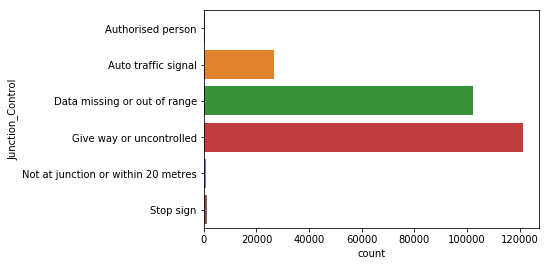

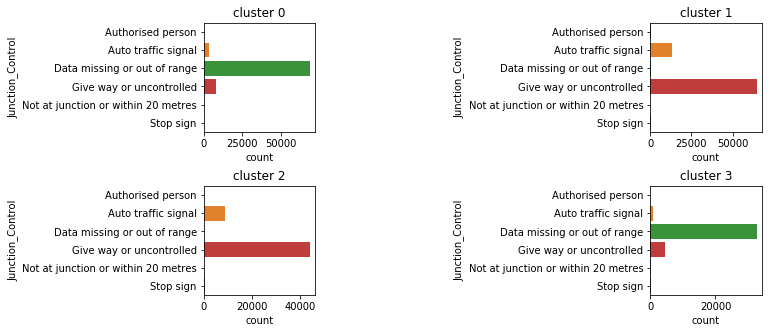

Junction_Detail
overall


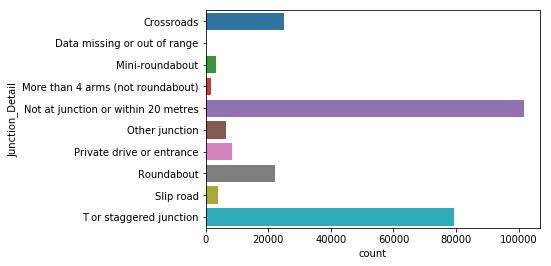

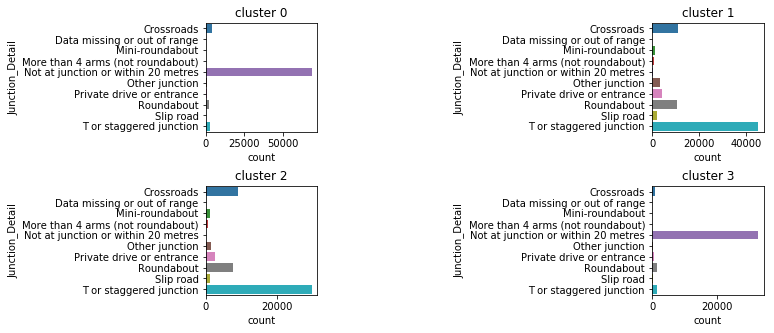

Number_of_Casualties
overall


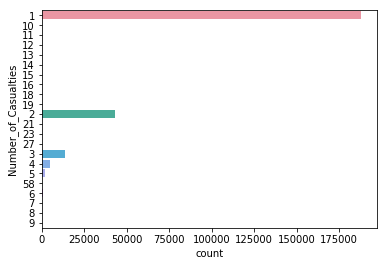

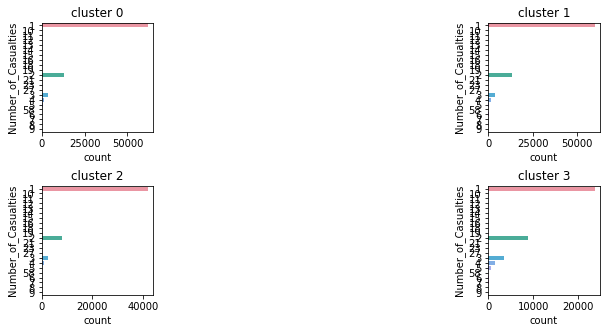

Number_of_Vehicles
overall


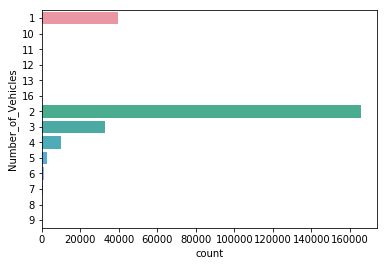

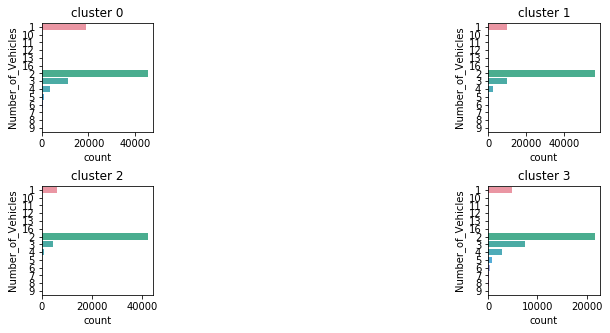

Speed_limit
overall


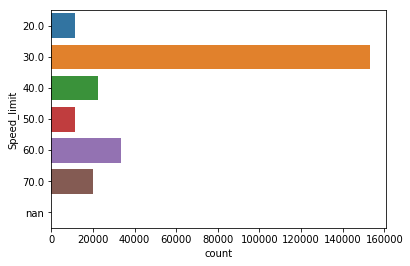

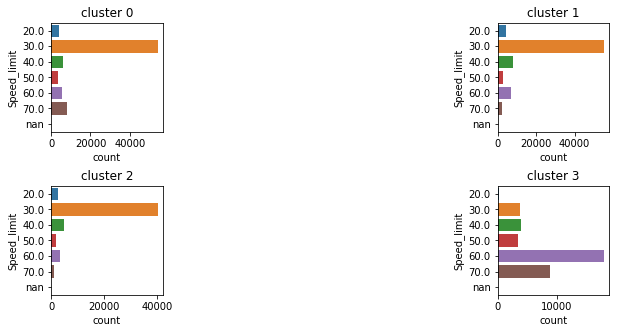

Urban_or_Rural_Area
overall


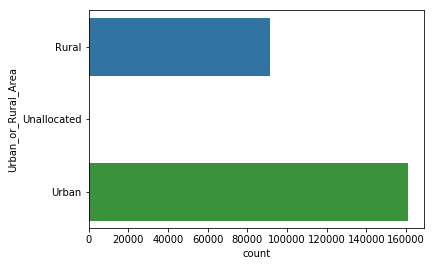

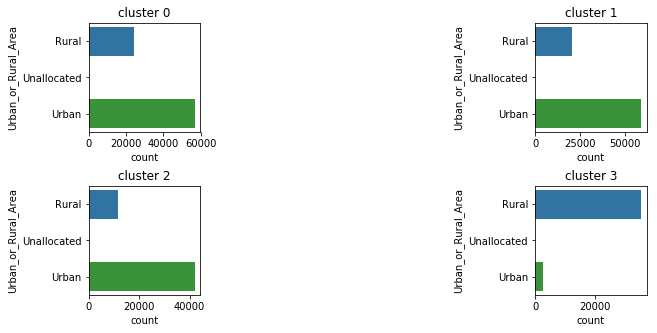

Junction_Location
overall


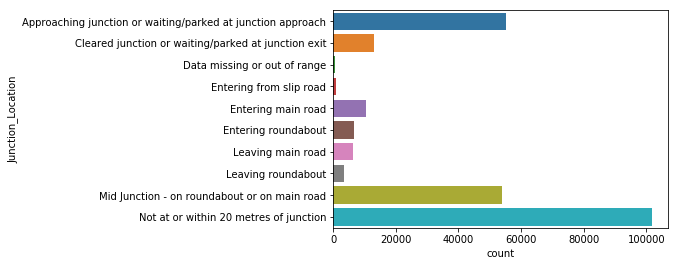

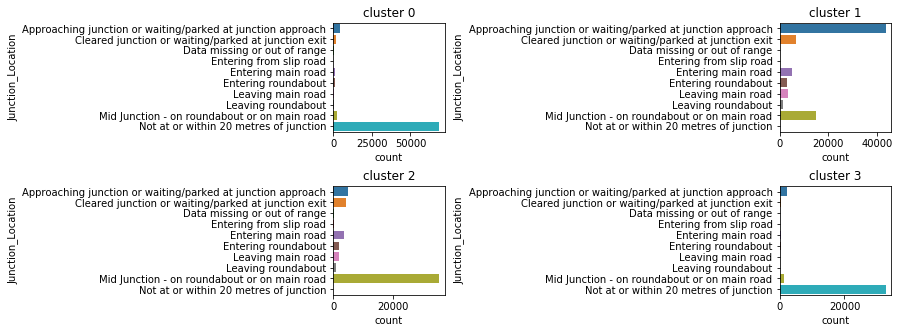

Vehicle_Manoeuvre
overall


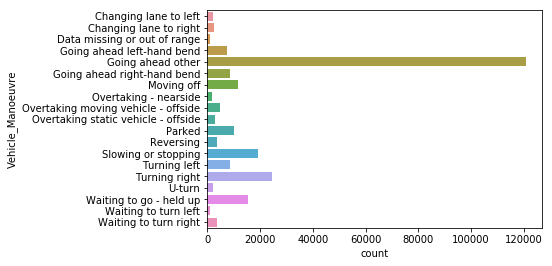

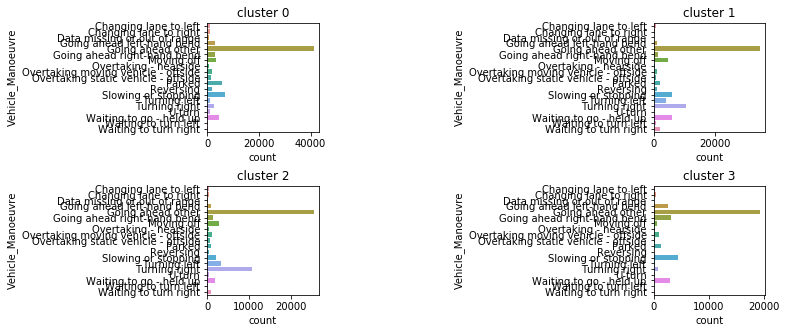

In [58]:
#to understand what each cluster mean I try made plots for each cluster and overall plots
interesting=['Junction_Control','Junction_Detail','Vehicle_Manoeuvre','Junction_Location','Vehicle_Manoeuvre','2nd_Road_Class','Number_of_Casualties','Number_of_Vehicles','Speed_limit','Urban_or_Rural_Area']
for col in df:
    if (interesting!=None and not col in interesting): continue
    print(col)
    print('overall')
    sns.countplot(y=df[col])
    plt.show()
    fig, axarr = plt.subplots(2,2,figsize=(10,5))
    for i in range(n_clusters):
        axarr[i//2][i%2].set_title('cluster '+str(i+1))
        sns.countplot(y=df[col][clusters==i],ax=axarr[i//2][i%2])
    plt.subplots_adjust(wspace=3,hspace=.5)
    plt.show()